# A2: Bias in data

In [1]:
# set up
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Data Preparation

First, let's get the data ready.

In [2]:
attack_comments = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_annotated_comments.tsv', sep = '\t')
attack_annotations = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_annotations.tsv',  sep = '\t')
attack_demograohics = pd.read_csv('data/Wikipedia_Talk_Labels_Personal_Attacks/attack_worker_demographics.tsv',  sep = '\t')

toxic_comments = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_annotated_comments.tsv', sep = '\t')
toxic_annotations = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_annotations.tsv',  sep = '\t')
toxic_demograohics = pd.read_csv('data/Wikipedia_Talk_Labels_Toxicity/toxicity_worker_demographics.tsv',  sep = '\t')

Join the three datasets for attack data.

In [3]:
attack = attack_comments.merge(attack_annotations, left_on = 'rev_id', right_on='rev_id')
attack = attack.merge(attack_demograohics, left_on = 'worker_id', right_on='worker_id')

For toxicity data, change the data type of rev_id to int first, before merging the datasets.

In [4]:
toxic_comments["rev_id"]= toxic_comments["rev_id"].astype(int)
toxic_annotations["rev_id"]= toxic_annotations["rev_id"].astype(int)

toxic = toxic_comments.merge(toxic_annotations, left_on = 'rev_id', right_on='rev_id')
toxic = toxic.merge(toxic_demograohics, left_on = 'worker_id', right_on='worker_id')

Now briefly inspect each table to check if we merge these datasets correctly

In [5]:
attack.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack,gender,english_first_language,age_group,education
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,False,article,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
1,3202092,NEWLINE_TOKENNEWLINE_TOKENHi. I haven't used o...,2004,True,user,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
2,4745553,NEWLINE_TOKENJust look it up. Its obvious.,2004,False,user,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
3,4855563,NEWLINE_TOKENNEWLINE_TOKENI'm going to gather ...,2004,True,article,random,test,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters
4,8350378,`NEWLINE_TOKENNEWLINE_TOKEN§ I got in touch wi...,2004,True,article,random,train,1362,0.0,0.0,0.0,0.0,0.0,male,0,18-30,masters


In [6]:
toxic.head()

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
1,37346,`If they are ``indisputable`` then why does th...,2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
2,227181,"NEWLINE_TOKENNEWLINE_TOKENWell, Ayn Rand certa...",2002,True,article,random,train,723,0,0.0,female,0,30-45,bachelors
3,2810755,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2004,True,user,random,train,723,0,0.0,female,0,30-45,bachelors
4,7270696,NEWLINE_TOKENNEWLINE_TOKEN==Useful info==NEWLI...,2004,True,article,random,train,723,0,0.0,female,0,30-45,bachelors


## Step 2: Analysis

First, let's analyze the basic demographic information about the Crowdflower workers in both personal attack and toxicity datasets. 

### Personal Attact
- **Gender:** 

male      0.615982
female    0.383562
other     0.000457
Name: gender, dtype: float64

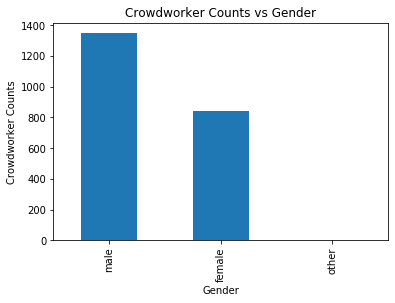

In [7]:
attack_gender = attack_demograohics['gender'].value_counts()
attack_gender.plot(kind='bar')
display(attack_gender/attack_gender.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Gender')
plt.title('Crowdworker Counts vs Gender')
plt.savefig('plot/attack_gender')
plt.show()

-  **Age:**

18-30       0.486775
30-45       0.385615
45-60       0.101160
Under 18    0.017169
Over 60     0.009281
Name: age_group, dtype: float64

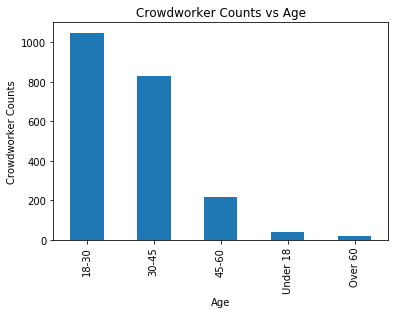

In [8]:
attack_age = attack_demograohics['age_group'].value_counts()
attack_age.plot(kind='bar')
display(attack_age/attack_age.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age')
plt.savefig('plot/attack_age')
plt.show()


- **Education**

bachelors       0.393607
hs              0.288128
masters         0.175799
professional    0.110959
some            0.021918
doctorate       0.009132
none            0.000457
Name: education, dtype: float64

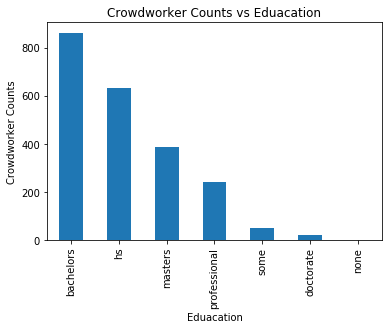

In [9]:
attack_ed = attack_demograohics['education'].value_counts()
attack_ed.plot(kind='bar')
display(attack_ed/attack_ed.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Eduacation')
plt.title('Crowdworker Counts vs Eduacation')
plt.savefig('plot/attack_education')
plt.show()

- **First Language** 

notes: 0 means first language is English, 1 means first language is not English

0    0.816438
1    0.183562
Name: english_first_language, dtype: float64

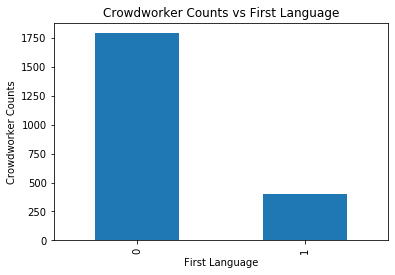

In [10]:
attack_eng = attack_demograohics['english_first_language'].value_counts()
attack_eng.plot(kind='bar')
display(attack_eng/attack_eng.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language')
plt.savefig('plot/attack_language')
plt.show()

### Toxicity
- **Gender:** 

male      0.648009
female    0.351713
other     0.000278
Name: gender, dtype: float64

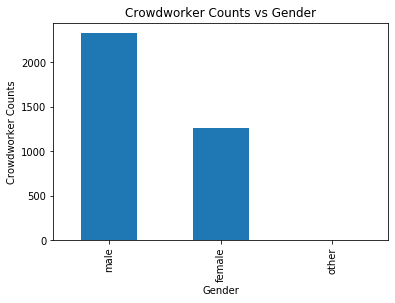

In [11]:
toxic_gender = toxic_demograohics['gender'].value_counts()
toxic_gender.plot(kind='bar')
display(toxic_gender/toxic_gender.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Gender')
plt.title('Crowdworker Counts vs Gender')
plt.savefig('plot/toxic_gender')
plt.show()

-  **Age:**

18-30       0.529880
30-45       0.354866
45-60       0.084234
Under 18    0.022482
Over 60     0.008537
Name: age_group, dtype: float64

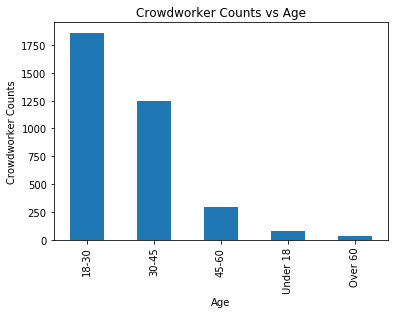

In [12]:
toxic_age = toxic_demograohics['age_group'].value_counts()
toxic_age.plot(kind='bar')
display(toxic_age/toxic_age.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Age')
plt.title('Crowdworker Counts vs Age')
plt.savefig('plot/toxic_age')
plt.show()

- **Education**

bachelors       0.401281
hs              0.285714
masters         0.152047
professional    0.122807
some            0.025898
doctorate       0.011417
none            0.000835
Name: education, dtype: float64

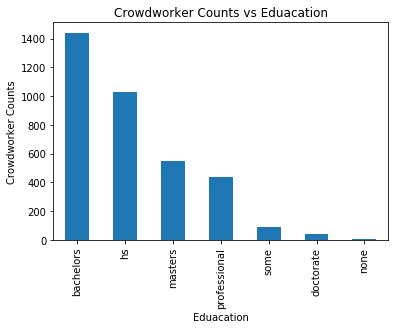

In [13]:
toxic_ed = toxic_demograohics['education'].value_counts()
toxic_ed.plot(kind='bar')
display(toxic_ed/toxic_ed.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('Eduacation')
plt.title('Crowdworker Counts vs Eduacation')
plt.savefig('plot/toxic_education')
plt.show()

- **First Language** 

notes: 0 means first language is English, 1 means first language is not English

0    0.814536
1    0.185464
Name: english_first_language, dtype: float64

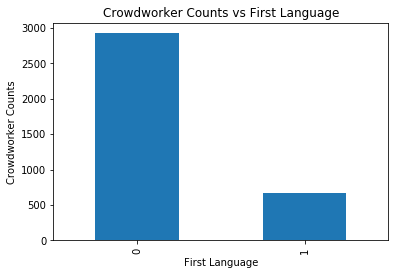

In [14]:
toxic_eng = toxic_demograohics['english_first_language'].value_counts()
toxic_eng.plot(kind='bar')
display(toxic_eng/toxic_eng.sum())
plt.ylabel('Crowdworker Counts')
plt.xlabel('First Language')
plt.title('Crowdworker Counts vs First Language')
plt.savefig('plot/toxic_language')
plt.show()

Then, let's check if the set of toxicity annotation workers is gender-balanced?

In [15]:
toxic_gender = toxic_demograohics.groupby("gender").age_group.count()
toxic_gender/toxic_gender.sum()

gender
female    0.351167
male      0.648549
other     0.000285
Name: age_group, dtype: float64

In [16]:
attack_ed = attack_demograohics.groupby("education").age_group.count()
attack_ed/attack_ed.sum()

education
bachelors       0.395360
doctorate       0.009281
hs              0.286311
masters         0.175870
none            0.000464
professional    0.111369
some            0.021346
Name: age_group, dtype: float64

In [17]:
toxic_ed = toxic_demograohics.groupby("education").age_group.count()
toxic_ed/toxic_ed.sum()

education
bachelors       0.401537
doctorate       0.011383
hs              0.284576
masters         0.151394
none            0.000854
professional    0.124360
some            0.025896
Name: age_group, dtype: float64

In [18]:
# a function helps to plot multiple bar charts based on v1 and v2 variable of dataframe df
def multibar_plot(df, v1, v2):
    new_data = df[[v1, v2]]
    new_data['count'] = 1
    new_data.pivot_table(index=[v1], columns=[v2], values='count', aggfunc=np.sum).plot(kind='bar')

In [19]:
attack_demograohics.loc[(attack_demograohics['education'] == 'hs') & (attack_demograohics['gender'] == 'female')].shape[0]

240

In [20]:
new_data = attack_demograohics[['education', 'gender']]
new_data['count'] = 1
new_data = new_data.pivot_table(index=['education'], columns=['gender'], values='count', aggfunc=np.sum)

In [21]:
new_data

gender,female,male,other
education,,,
bachelors,363.0,498.0,1.0
doctorate,8.0,12.0,NaN
hs,240.0,391.0,NaN
masters,148.0,237.0,NaN
none,NaN,1.0,NaN
professional,63.0,180.0,NaN
some,18.0,30.0,NaN


In [22]:
attack_demograohics.shape

(2190, 5)

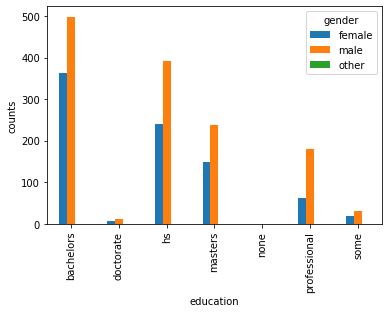

In [23]:
multibar_plot(attack_demograohics, 'education', 'gender')
plt.ylabel('counts')
plt.show()


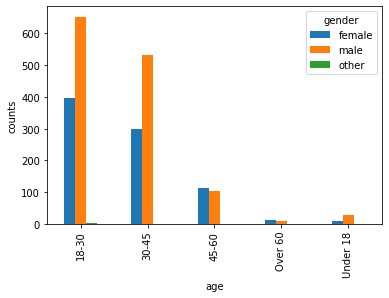

In [24]:
multibar_plot(attack_demograohics, 'age_group', 'gender')
plt.ylabel('counts')
plt.xlabel('age')
plt.show()

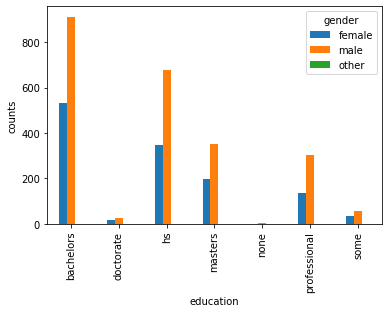

In [25]:
multibar_plot(toxic_demograohics, 'education', 'gender')
plt.ylabel('counts')
plt.show()

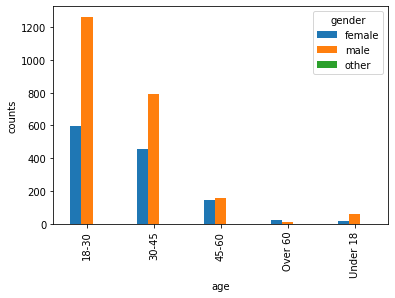

In [26]:
multibar_plot(toxic_demograohics, 'age_group', 'gender')
plt.ylabel('counts')
plt.xlabel('age')
plt.show()

## Step 3: Implications for research and product development

- Which, if any, of these demo applications would you expect the Perspective API or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

WikiDetox is probably one demo application that I would expect the Perspective API to perform well in. It is a data visualization of toxic comments on Wikipedia. Since the Perspective API is trained based on comments from the Wikipedia Talk page and now it is used to show the result on the same trained data, but not used for predictions on some new datasets. Therefore, this application would work well using the Perspective API.WikiDetox is probably one demo application that I would expect the Perspective API to perform well in. It is a data visualization of toxic comments on Wikipedia. Since the Perspective API is trained based on comments from the Wikipedia Talk page and now it is used to show the result on the same trained data, but not used for predictions on some new datasets. Therefore, this application would work well using the Perspective API.

- Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

Behave! is a demo application that I found to be interesting, but I personally have some concerns about this project using the Perspective API, as I do not believe it would perform well as expected. The Perspective API is trained on Wikipedia Talk page discussions and all of the comments are in English. However, users on Youtube, Reddit, and other comment forums may have different language styles than those on the Wikipedia Talk page and moreover, there may be a lot of languages used other than English, such as Spanish, Chinese, and so on. Clearly, the Perspective API might not detect the toxic comments in these languages, since only English comments are included in the training dataset. Therefore, it may be hard for this application to achieve high accuracy on comment detection on many websites.

- Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

First of all, I would probably enrich the training data by using not only Wikipedia Talk page, but also some other types of text sources, such as youtube comments, twitter comments and some other comment forums or social media. Also, if possible, I would try include more languages. Second, I would probably make sure to increase the diveristy of annotators to make sure more groups are representated, as the majority of annotators are male English speakers in this dataset. 
